In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('avanti')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results/results_training/binary_only_positive/"
list_documents = os.listdir(path_data)
len(list_documents)

960

In [5]:
list_df = []
for element in list_documents:
    df_data = pd.read_csv(f"{path_data}{element}")
    name_values = element.split("_exploring")[0]
    df_data['encoder'] = name_values
    list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,test_accuracy,test_f1_score,test_precision,test_recall,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.936853,0.936584,0.943419,0.936853,0.008276,0.045503,0.923762,0.924132,0.932689,0.924132,22,word2vec
1,DecisionTree,0.938923,0.938913,0.939066,0.938923,0.707123,0.007454,0.950753,0.950756,0.950943,0.950756,22,word2vec
2,Bagging,0.964803,0.964798,0.964926,0.964803,4.362713,0.010710,0.956071,0.956074,0.956254,0.956074,22,word2vec
3,RandomForest,0.984472,0.984472,0.984474,0.984472,2.163020,0.017423,0.983584,0.983586,0.983747,0.983586,22,word2vec
4,ExtraTrees,0.985507,0.985507,0.985515,0.985507,0.439025,0.019814,0.984029,0.984031,0.984159,0.984031,22,word2vec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.914079,0.914027,0.914308,0.914079,3.999878,0.010771,0.893038,0.893075,0.894218,0.893075,29,Group_7
7,XGBoost,0.909938,0.909953,0.910065,0.909938,5.189768,0.019918,0.908159,0.908165,0.908528,0.908165,29,Group_7
8,Gaussian Process,0.527950,0.377850,0.753584,0.527950,7.909546,0.508367,0.335701,0.497781,0.650021,0.497781,29,Group_7
9,Hist Gradient Boosting,0.918219,0.918222,0.918227,0.918219,6.104940,0.014724,0.907685,0.907715,0.908543,0.907715,29,Group_7


In [6]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_test = df_results[['description', 'test_accuracy', 'test_f1_score', 'test_precision',
    'test_recall', 'iteration', 'encoder']]

df_results_test.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "Iteration", "Encoder"]
df_results_test['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_test], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage
0,KNeighbors,0.923762,0.924132,0.932689,0.924132,22,word2vec,Training
1,DecisionTree,0.950753,0.950756,0.950943,0.950756,22,word2vec,Training
2,Bagging,0.956071,0.956074,0.956254,0.956074,22,word2vec,Training
3,RandomForest,0.983584,0.983586,0.983747,0.983586,22,word2vec,Training
4,ExtraTrees,0.984029,0.984031,0.984159,0.984031,22,word2vec,Training
...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.914027,0.914079,0.914308,0.914079,29,Group_7,Validating
7,XGBoost,0.909953,0.909938,0.910065,0.909938,29,Group_7,Validating
8,Gaussian Process,0.377850,0.527950,0.753584,0.527950,29,Group_7,Validating
9,Hist Gradient Boosting,0.918222,0.918219,0.918227,0.918219,29,Group_7,Validating


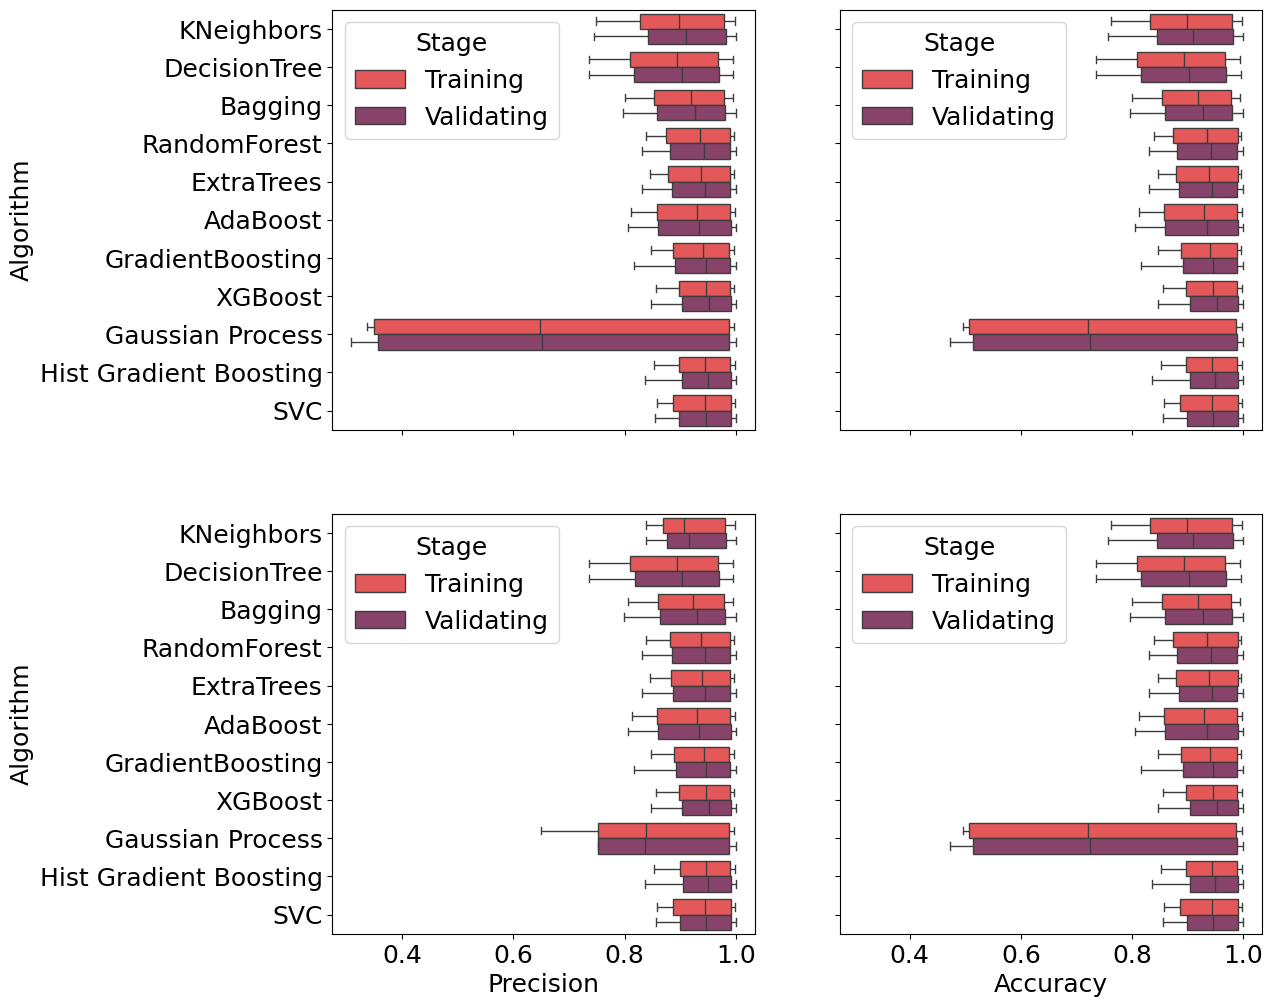

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

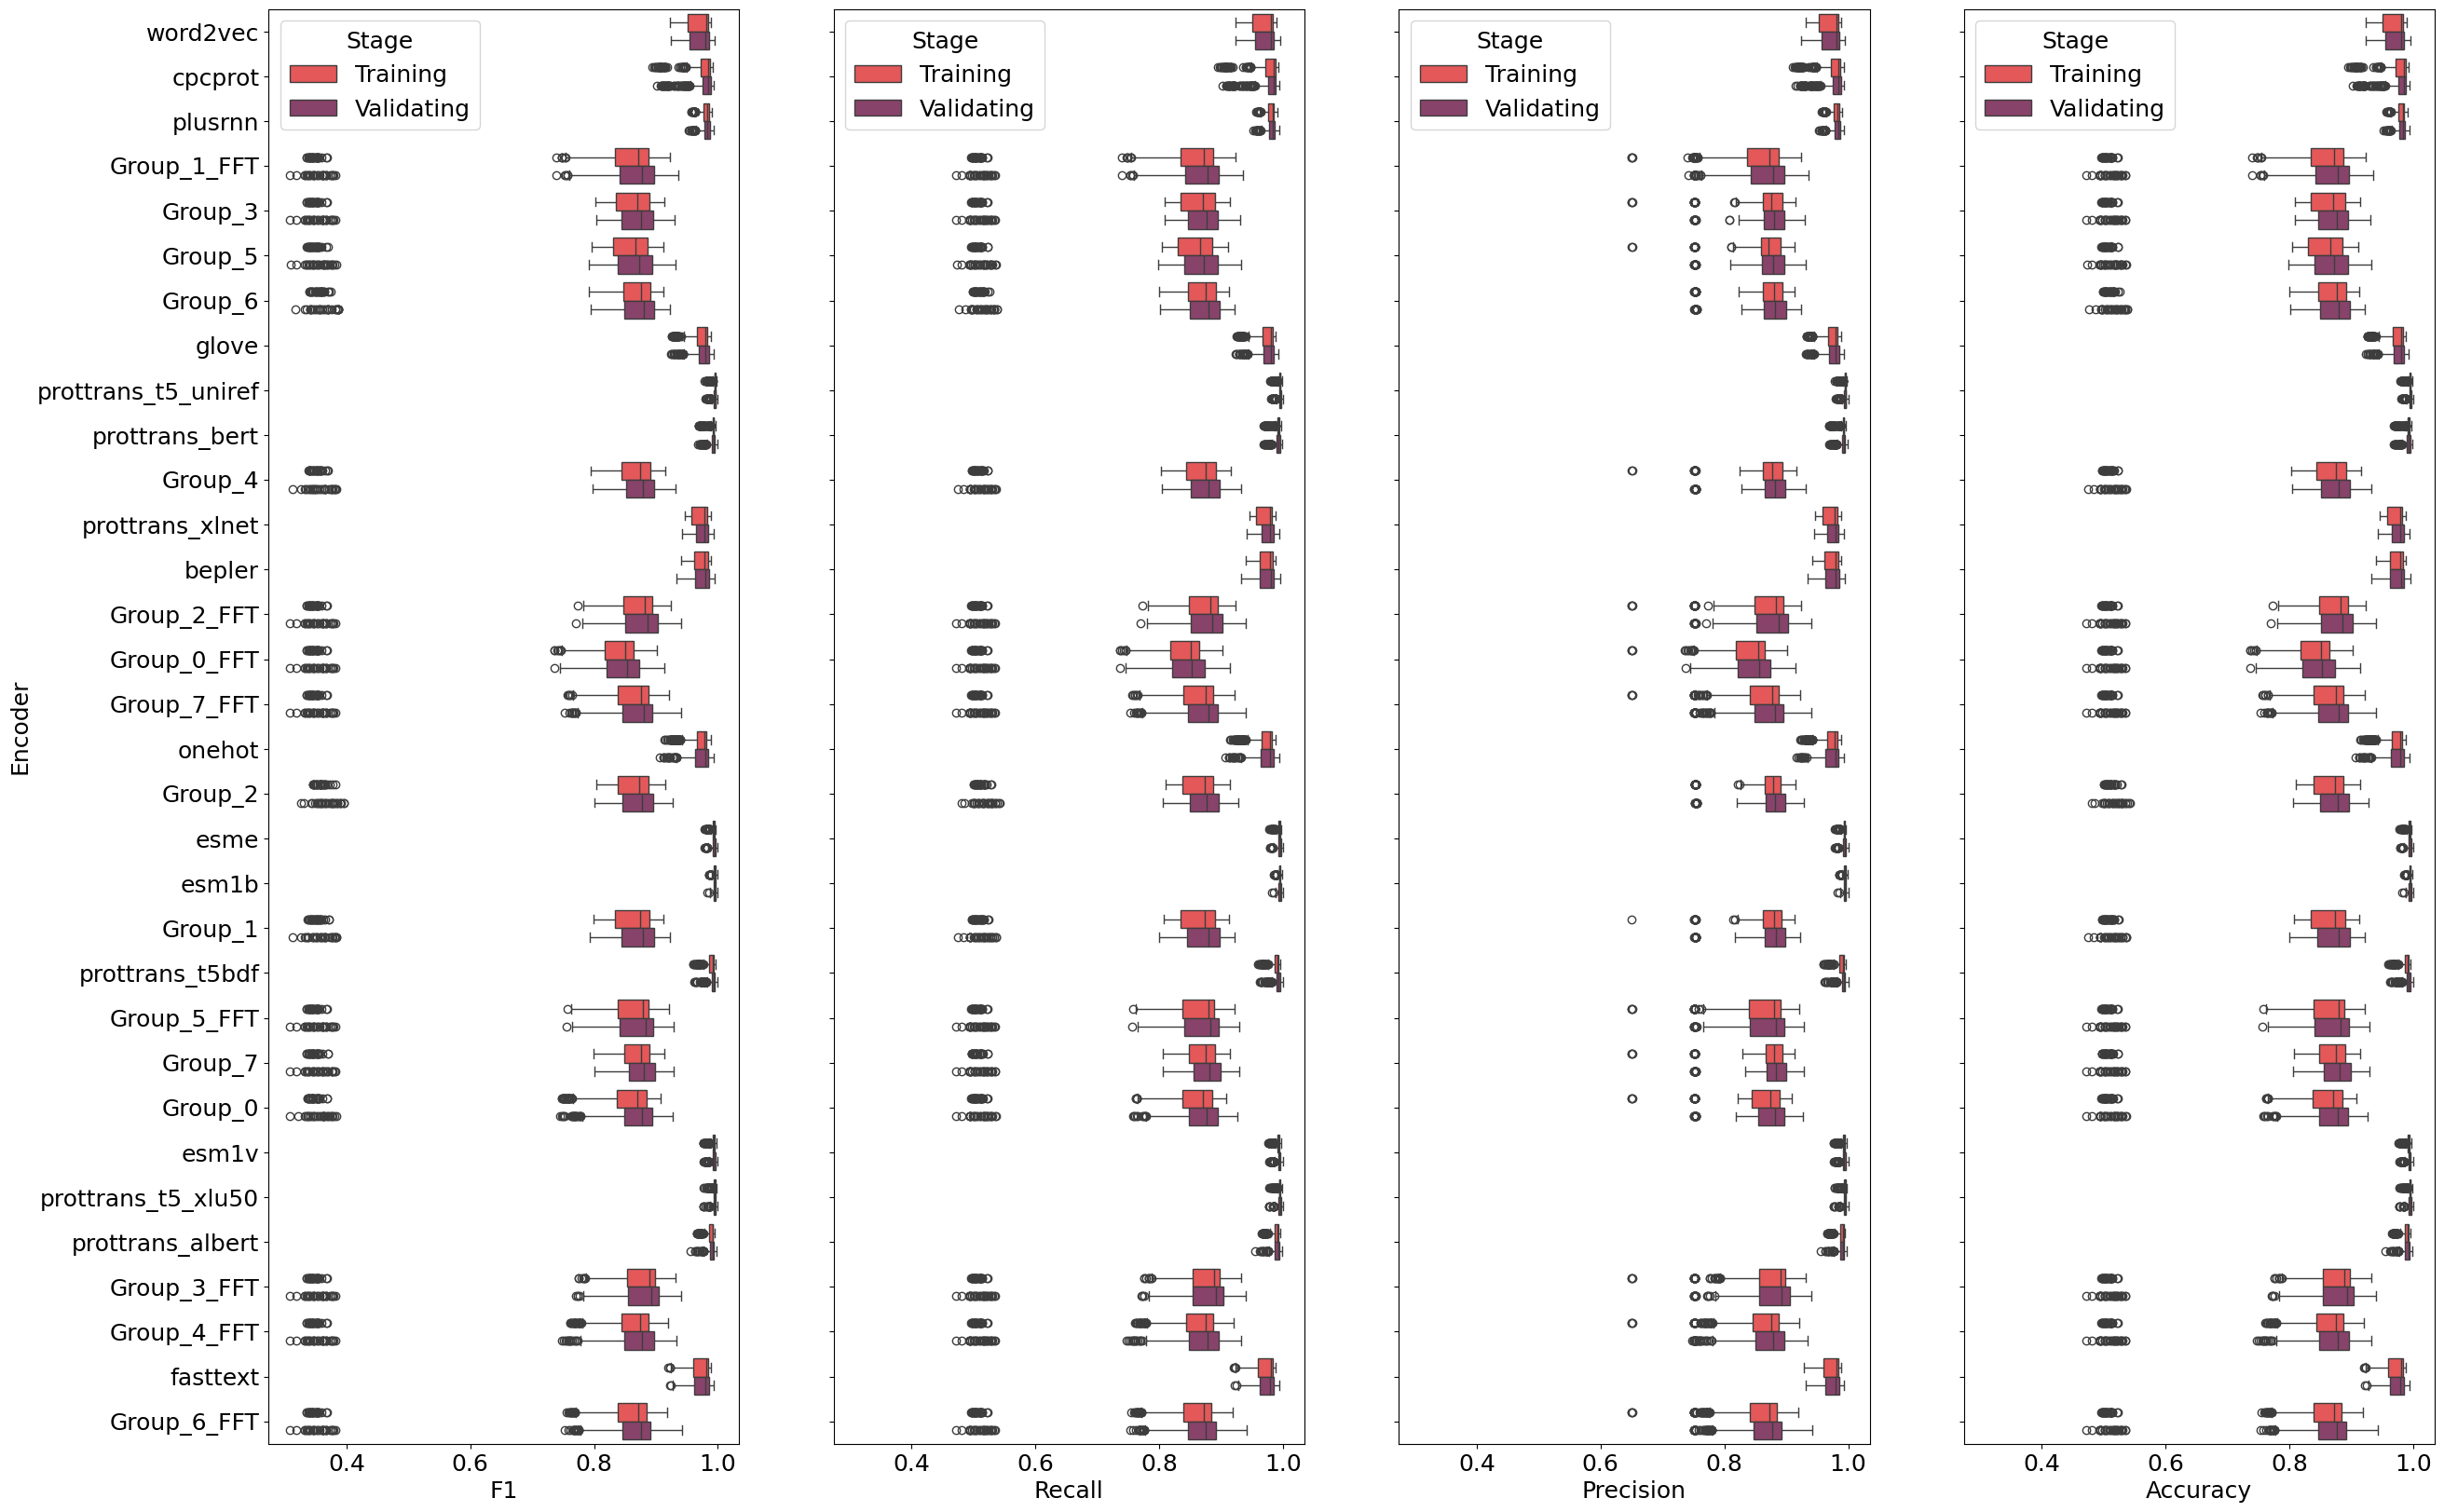

In [8]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

In [11]:
selection_instance = SelectionMethod()
selection_instance.select(15, df_results_train, df_results_test)

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
123,ExtraTrees,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
124,ExtraTrees,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
147,Gaussian Process,esm1v,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
251,KNeighbors,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
283,RandomForest,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
317,SVC,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
